## ¿Cómo trabajar con los resultados de segmentación?

In [1]:
# Cargar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import (active_contour, felzenszwalb, quickshift,
                                 mark_boundaries, slic, clear_border)

import io

In [2]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

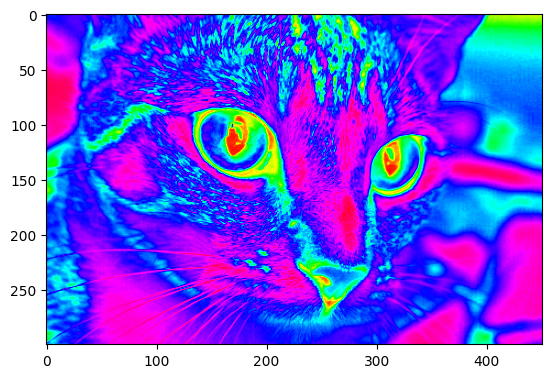

In [3]:
# Leo la imagen chelsea (es un gato)
chelsea = data.chelsea()

plt.imshow(chelsea[:,:,0],cmap = 'hsv')

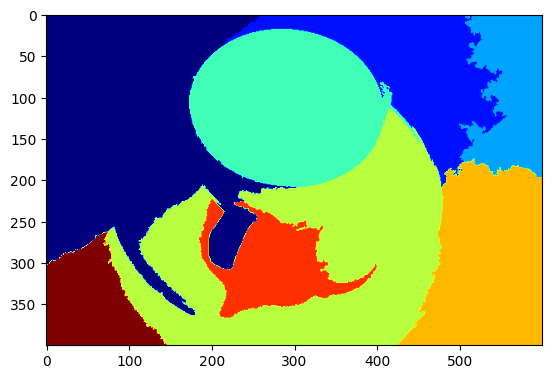

In [4]:
plt.imshow(slic(data.coffee(),n_segments=10),cmap='jet')

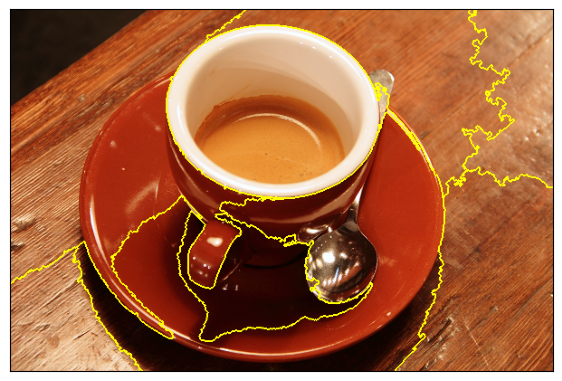

In [5]:
imshow(mark_boundaries(data.coffee(),slic(data.coffee(),n_segments=10)))

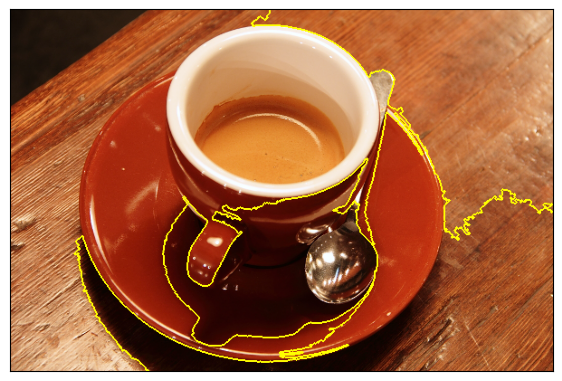

In [6]:
imshow(mark_boundaries(data.coffee(),
                       slic(data.coffee(),
                            n_segments=5)))

## Otros tipos de segmentación

<ipython-input-7-86c9c2cacef2>:1: FutureWarning: `multichannel` is a deprecated argument name for `felzenszwalb`. It will be removed in version 1.0. Please use `channel_axis` instead.
  segmentationChelsea = felzenszwalb(chelsea,multichannel=True, scale = 300, sigma = 0.2)


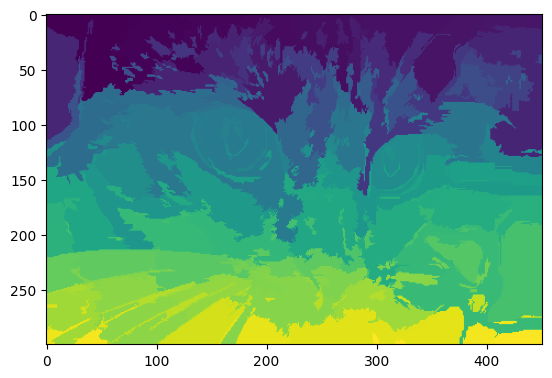

In [7]:
segmentationChelsea = felzenszwalb(chelsea,multichannel=True, scale = 300, sigma = 0.2)
plt.imshow(segmentationChelsea)

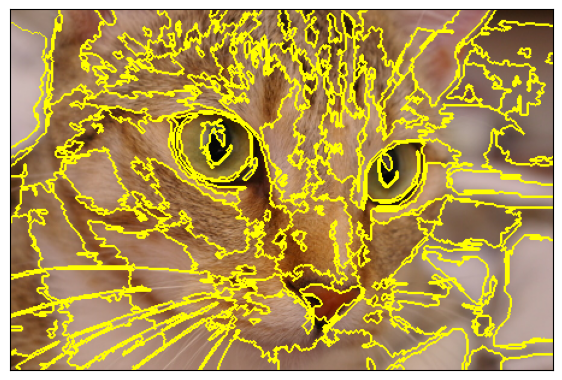

In [8]:
imshow(mark_boundaries(chelsea,
                       segmentationChelsea))

## Agregación multiescala

In [9]:
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np

In [10]:
img = data.coffee()
labels = segmentation.slic(img, compactness=30, n_segments=400)
g = graph.rag_mean_color(img, labels)

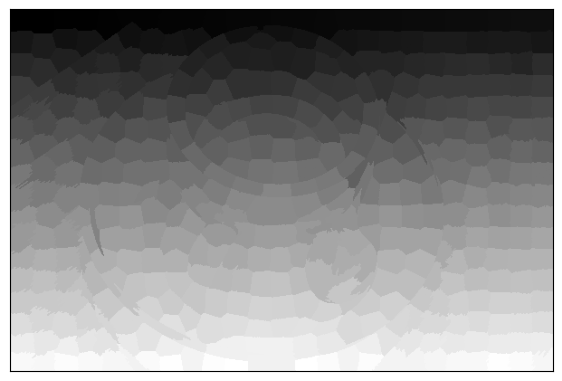

In [11]:
imshow(labels)

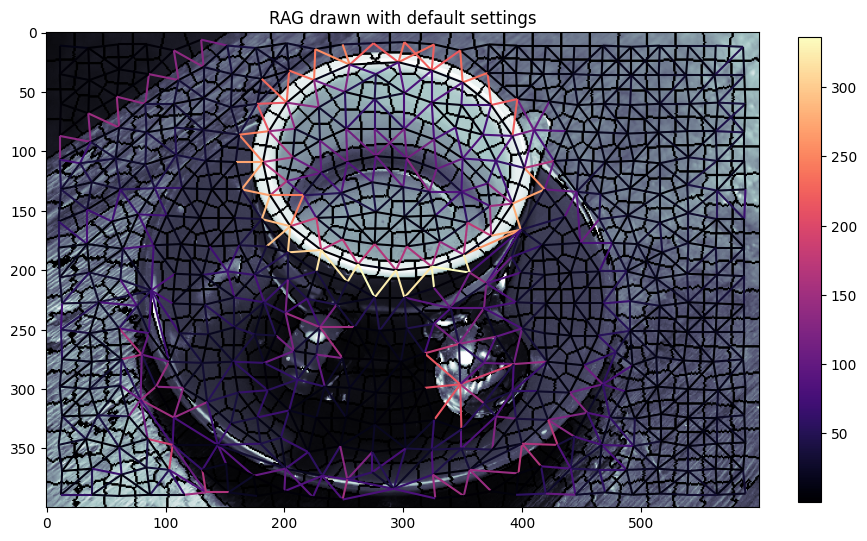

In [12]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(10, 15))

ax.set_title('RAG drawn with default settings')
lc = graph.show_rag(labels, g, img, ax=ax)
# specify the fraction of the plot area that will be used to draw the colorbar
fig.colorbar(lc, fraction=0.03, ax=ax)